# Telecom Churn Prediction - Starter Notebook

**Author:** Ribha, Rashmi, Rathnagiri

## 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

## 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [452]:
# uncomment only if executing locally
# %pip install missingno

In [453]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import datetime

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# regex related
import re

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables.

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [454]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [455]:
# from google.colab import drive
# drive.mount('/content/drive')

In [456]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

# data = pd.read_csv("/kaggle/input/kagglelabstest2021/train.csv")
# unseen = pd.read_csv("/kaggle/input/kagglelabstest2021/test.csv")
# sample = pd.read_csv("/kaggle/input/kagglelabstest2021/sample.csv")
# data_dict = pd.read_csv("/kaggle/input/kagglelabstest2021/data_dictionary.csv")

# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/train.csv")
# unseen = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/test.csv")
# sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/sample.csv")
# data_dict = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Data/data_dictionary.csv")

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [457]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


1. Lets analyze the data dictionary versus the churn dataset.
2. The data dictonary contains a list of abbrevations which provide you all the information you need to understand what a specific feature/variable in the churn dataset represents
3. Example:

> "arpu_7" -> Average revenue per user + KPI for the month of July
>
> "onnet_mou_6" ->  All kind of calls within the same operator network + Minutes of usage voice calls + KPI for the month of June
>
>"night_pck_user_8" -> Scheme to use during specific night hours only + Prepaid service schemes called PACKS + KPI for the month of August
>
>"max_rech_data_7" -> Maximum + Recharge + Mobile internet + KPI for the month of July

Its important to understand the definitions of each feature that you are working with, take notes on which feature you think might impact the churn rate of a user, and what sort of analysis could you do to understand the distribution of the feature better.

In [458]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [459]:
data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

## Common Utility Methods

In [460]:
def summarize_missing_values(df, x, y):
    """
    Summarizes columns in a dataframe that have missing values within a specified range.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.
        x (float): The minimum percentage of missing values.
        y (float): The maximum percentage of missing values.

    Returns:
        pandas.DataFrame: A DataFrame with columns 'Column Name', 'Missing Values', and 'percentMissing'.
    """
    # Calculate missing values and their percentages
    missing_values = df.isna().sum()
    percent_missing = (missing_values / len(df)) * 100

    # Filter columns based on missing value percentage range
    filtered_cols = (percent_missing > x) & (percent_missing <= y)
    result_df = pd.DataFrame({
        'Column Name': df.columns[filtered_cols],
        'Missing Values': missing_values[filtered_cols],
        'percentMissing': percent_missing[filtered_cols]
    }).round({'percentMissing': 2}).sort_values(by='percentMissing', ascending=False)

    result_df.reset_index(inplace=True, drop=True)

    # Print the result
    print(result_df)

    return result_df

In [461]:
def identify_same_value_features(df):
    """
    Identifies columns in a dataframe where all rows have the same value.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        list: A list of column names that have only one unique value.
    """
    sameValueColumns = []
    for col in df.columns:
        if df[col].nunique() == 1:
            sameValueColumns.append(col)
            print(df[col].value_counts())
    print(sameValueColumns)

    return sameValueColumns

In [462]:
def replace_blanks_with_zeros(df, column_names):
  """
  Replaces blank (NaN) values with zeros in a specified column if the column
  contains only binary values (0 and 1).

  Args:
      df (pd.DataFrame): The input DataFrame.
      column_name (str): The names of the columns to check and modify.

  Returns:
      None
  """
  for column_name in column_names:
    if df[column_name].dropna().isin([0, 1]).all():
      df[column_name].fillna(0, inplace=True)
      print(f"Found {column_name} and replacing blanks with zero")


In [463]:
def get_correlated_columns(df, threshold=0.60):
  """
  This function finds column pairs in a DataFrame with correlation greater than a threshold.

  Args:
      df: The pandas DataFrame to analyze.
      threshold: The minimum correlation coefficient (absolute value) to consider.

  Returns:
      A list of tuples containing the column names and their correlation coefficient.
  """
  correlation_matrix = df.corr()
  correlated_pairs = []

  # Iterate the upper triangle of the correlation matrix (excluding diagonal)
  for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
      # We should only process upper triangle and avoid self-correlation
      if col1 != col2 and col1 > col2:
        correlation_value = correlation_matrix.loc[col1, col2]
        # Check for absolute correlation greater than the threshold
        if abs(correlation_value) > threshold:
          correlated_pairs.append((col1, col2, correlation_value))

  return correlated_pairs

In [464]:
def print_correlated_column_pairs_with_corr_value(df, threshold=0.60):
  """
  This function uses get_correlated_columns() and finds and
  prints column pairs in a DataFrame with correlation greater than a threshold.

  Args:
      df: The pandas DataFrame to analyze.
      threshold: The minimum correlation coefficient (absolute value) to consider.

  Returns:
      A list of tuples containing the column names and their correlation coefficient.
  """
  numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
  numerical_cols.remove('churn_probability') #Removing target variable
  correlated_pairs = get_correlated_columns(df[numerical_cols], threshold)

  if correlated_pairs:
    print(f"Correlated column pairs (absolute correlation > {threshold}):")
    for pair in correlated_pairs:
      print(f"- {pair[0]} with {pair[1]}: {pair[2]:.2f}")
  else:
    print(f"No column pairs found with correlation greater than {threshold}")

  return correlated_pairs

In [465]:
def print_vif(X):
    vif = pd.DataFrame(data=X.columns, columns=['Features'])
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [466]:
def print_logistic_model_summary(XTrain, ytrain, XTest, ytest, add_constant=True, family=sm.families.Binomial()):
    try:
        # Ensure X is a DataFrame for consistent handling
        if not isinstance(XTrain, pd.DataFrame):
            X = pd.DataFrame(XTrain)
        if not isinstance(X_test, pd.DataFrame):
            XTest = pd.DataFrame(XTest)

        # Optionally add a constant to the feature matrix
        if add_constant:
            XTrain = sm.add_constant(XTrain)
            XTest = sm.add_constant(XTest)

        # Build and fit the logistic regression model
        logm2 = sm.GLM(ytrain, XTrain, family=family)
        res = logm2.fit()

        # Output the summary of the model
        print(res.summary())

                # Predict on the test set
        y_pred = res.predict(XTest)
        y_pred_binary = (y_pred > 0.5).astype(int)

        # Calculate and print evaluation metrics
        auc = roc_auc_score(y_test, y_pred)
        precision = precision_score(ytest, y_pred_binary)
        recall = recall_score(ytest, y_pred_binary)
        f1 = f1_score(ytest, y_pred_binary)


        print("\n------------------------------------------\n")
        print(f'AUC-ROC: {auc:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Sensitivity (Recall): {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')

        print("\n------------------------------------------\n")

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [467]:
#output_path = '/content/drive/MyDrive/Colab Notebooks/01. Assignments/2. Telecom Churn Case Study/Kaggle Submission Files'
output_path = './SubmissionFiles'
def predict_and_save(pipe, selected_features, model_name, output_path):
    unseen_clone = unseen.copy()
    submission_data = unseen_clone[selected_features]

    # Ensure submission_data is a DataFrame
    if not isinstance(submission_data, pd.DataFrame):
        submission_data = pd.DataFrame(submission_data)

    # Make and store predictions using the pipeline
    unseen_clone['churn_probability'] = pipe.predict(submission_data)

    # Create the output DataFrame with 'id' and 'churn_probability'
    output = unseen_clone[['id', 'churn_probability']]

    # Generate the current timestamp for the file name
    current_time = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    # Create the full path for the output file
    output_file_path = f"{output_path}/submission_{model_name}_{current_time}.csv"

    # Save the output DataFrame to a CSV file
    output.to_csv(output_file_path, index=False)

    return output

## Prepare Data


In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [469]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


### Handle Date Fields

In [470]:
# Following are the date fields:
# TODO: Remove for now, to build model, revisit later to analyse
dateFields = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

data.drop(dateFields, axis=1, inplace=True)


In [471]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 163 entries, id to churn_probability
dtypes: float64(135), int64(28)
memory usage: 87.1 MB


## Handle Highly skewed or features with no variance

In [472]:
sameValueColumns = identify_same_value_features(data)

circle_id
109    69999
Name: count, dtype: int64
loc_og_t2o_mou
0.0    69297
Name: count, dtype: int64
std_og_t2o_mou
0.0    69297
Name: count, dtype: int64
loc_ic_t2o_mou
0.0    69297
Name: count, dtype: int64
std_og_t2c_mou_6
0.0    67231
Name: count, dtype: int64
std_og_t2c_mou_7
0.0    67312
Name: count, dtype: int64
std_og_t2c_mou_8
0.0    66296
Name: count, dtype: int64
std_ic_t2o_mou_6
0.0    67231
Name: count, dtype: int64
std_ic_t2o_mou_7
0.0    67312
Name: count, dtype: int64
std_ic_t2o_mou_8
0.0    66296
Name: count, dtype: int64
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


These features all have same values and therefore they can be removed since just having only one value constant in all rows doesn't help with analysis

In [473]:
sameValueColumns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [474]:
data.drop(sameValueColumns, inplace=True, axis=1)

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 153 entries, id to churn_probability
dtypes: float64(126), int64(27)
memory usage: 81.7 MB


Let's also summarize the features using the df.describe method:

In [476]:
data.describe(include="all")

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,7.410000,6.675000,6.410000,34.860000,32.240000,31.575000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,370.791000,365.369500,369.909000,119.390000,115.837500,115.060000,232.990000,227.630000,229.345000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [477]:
# Create a combined total mou column instead of offnet and onnet

data['total_mou_6'] = data['onnet_mou_6'] + data['offnet_mou_6']
data['total_mou_7'] = data['onnet_mou_7'] + data['offnet_mou_7']
data['total_mou_8'] = data['onnet_mou_8'] + data['offnet_mou_8']

# Drop the redundant columns
data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

data.head()

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_6,total_mou_7,total_mou_8
0,0,31.277,87.009,7.527,0.00,0.0,0.0,0.00,0.0,0.00,...,NaN,NaN,1958,0.0,0.0,0.0,0,80.82,221.06,3.62
1,1,0.000,122.787,42.953,0.00,0.0,0.0,0.00,0.0,0.00,...,1.0,NaN,710,0.0,0.0,0.0,0,0.00,25.99,30.89
2,2,60.806,103.176,0.000,0.00,0.0,0.0,0.00,0.0,0.00,...,NaN,NaN,882,0.0,0.0,0.0,0,54.52,97.98,0.00
3,3,156.362,205.260,111.095,0.00,0.0,0.0,0.00,0.0,1.63,...,NaN,NaN,982,0.0,0.0,0.0,0,76.02,94.49,50.23
4,4,240.708,128.191,101.565,53.64,0.0,0.0,15.73,0.0,0.00,...,1.0,1.0,647,0.0,0.0,0.0,0,78.27,42.94,15.76


In [478]:
# We need to make similar changes in unseen
unseen['total_mou_6'] = unseen['onnet_mou_6'] + unseen['offnet_mou_6']
unseen['total_mou_7'] = unseen['onnet_mou_7'] + unseen['offnet_mou_7']
unseen['total_mou_8'] = unseen['onnet_mou_8'] + unseen['offnet_mou_8']

# Drop the redundant columns
unseen.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_mou_6,total_mou_7,total_mou_8
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,NaN,NaN,NaN,1692,0.00,0.00,0.00,91.94,52.39,57.94
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,NaN,NaN,NaN,2533,0.00,0.00,0.00,549.85,663.05,414.78
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,NaN,NaN,NaN,277,525.61,758.41,241.84,24.52,53.67,53.44
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,NaN,NaN,NaN,1244,0.00,0.00,0.00,45.35,207.17,24.01
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,NaN,NaN,NaN,462,0.00,0.00,0.00,511.87,632.87,774.84


### Analyse Missing values

In [479]:
result = summarize_missing_values(data, 0, 100)
result.shape

            Column Name  Missing Values  percentMissing
0       count_rech_3g_6           52431           74.90
1             fb_user_6           52431           74.90
2       max_rech_data_6           52431           74.90
3    av_rech_amt_data_6           52431           74.90
4             arpu_2g_6           52431           74.90
..                  ...             ...             ...
100        spl_og_mou_7            2687            3.84
101        isd_og_mou_7            2687            3.84
102    std_ic_t2f_mou_7            2687            3.84
103        std_og_mou_7            2687            3.84
104        loc_ic_mou_7            2687            3.84

[105 rows x 3 columns]


(105, 3)

#### Replace missing values for columns that just have binary values

In [480]:
replace_blanks_with_zeros(data, result['Column Name'])

Found fb_user_6 and replacing blanks with zero
Found night_pck_user_6 and replacing blanks with zero
Found night_pck_user_7 and replacing blanks with zero
Found fb_user_7 and replacing blanks with zero
Found night_pck_user_8 and replacing blanks with zero
Found fb_user_8 and replacing blanks with zero


In [481]:
result = summarize_missing_values(data, 0, 100)
result.shape

           Column Name  Missing Values  percentMissing
0   av_rech_amt_data_6           52431           74.90
1            arpu_2g_6           52431           74.90
2      max_rech_data_6           52431           74.90
3      count_rech_2g_6           52431           74.90
4      count_rech_3g_6           52431           74.90
..                 ...             ...             ...
94    std_ic_t2f_mou_7            2687            3.84
95       roam_ic_mou_7            2687            3.84
96    std_ic_t2m_mou_7            2687            3.84
97        loc_ic_mou_7            2687            3.84
98    loc_ic_t2f_mou_7            2687            3.84

[99 rows x 3 columns]


(99, 3)

In [482]:
# lets see how much are between 40 and 100
result = summarize_missing_values(data, 40, 100)
result.shape

           Column Name  Missing Values  percentMissing
0    total_rech_data_6           52431           74.90
1   av_rech_amt_data_6           52431           74.90
2      max_rech_data_6           52431           74.90
3            arpu_2g_6           52431           74.90
4      count_rech_2g_6           52431           74.90
5            arpu_3g_6           52431           74.90
6      count_rech_3g_6           52431           74.90
7            arpu_2g_7           52134           74.48
8            arpu_3g_7           52134           74.48
9   av_rech_amt_data_7           52134           74.48
10     count_rech_3g_7           52134           74.48
11   total_rech_data_7           52134           74.48
12     count_rech_2g_7           52134           74.48
13     max_rech_data_7           52134           74.48
14     count_rech_3g_8           51582           73.69
15     count_rech_2g_8           51582           73.69
16  av_rech_amt_data_8           51582           73.69
17     max

(21, 3)

In [483]:
lessThan40PercentColumns = [name for name, percent in zip(result['Column Name'], result['percentMissing']) if percent > 40 ]

print(lessThan40PercentColumns)

['total_rech_data_6', 'av_rech_amt_data_6', 'max_rech_data_6', 'arpu_2g_6', 'count_rech_2g_6', 'arpu_3g_6', 'count_rech_3g_6', 'arpu_2g_7', 'arpu_3g_7', 'av_rech_amt_data_7', 'count_rech_3g_7', 'total_rech_data_7', 'count_rech_2g_7', 'max_rech_data_7', 'count_rech_3g_8', 'count_rech_2g_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'arpu_3g_8', 'total_rech_data_8', 'arpu_2g_8']


In [484]:
data.drop(columns=lessThan40PercentColumns, inplace=True, axis=1)

In [485]:
data.describe()

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_6,total_mou_7,total_mou_8
count,69999.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,67231.000000,67312.000000,66296.000000
mean,34999.000000,283.134365,278.185912,278.858826,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,...,0.232132,0.234246,1220.639709,68.108597,65.935830,60.07674,0.101887,332.028045,331.047821,329.521833
std,20207.115084,334.213918,344.366927,351.924315,57.374429,55.960985,53.408135,73.469261,58.511894,64.618388,...,0.422196,0.423530,952.426321,269.328659,267.899034,257.22681,0.302502,476.976274,488.779792,490.772935
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000,61.595000,56.640000,55.880000
50%,34999.000000,197.484000,191.588000,192.234000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000,167.520000,159.745000,159.690000
75%,52498.500000,370.791000,365.369500,369.909000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000,407.255000,406.430000,403.487500
max,69998.000000,27731.088000,35145.834000,33543.624000,2850.980000,4155.830000,4169.810000,3775.110000,2812.040000,5337.040000,...,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000,10673.280000,8235.710000,14043.050000


## EDA on Numerical Data

In [486]:
data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [487]:
numerical_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print(numerical_cols)

['id', 'arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2

In [488]:
numerical_cols.remove('churn_probability') #Removing target variable
correlationMatrix = data[numerical_cols].corr()

In [489]:
#print(correlationMatrix)
# Uncomment later
# plt.figure(figsize=(30, 30))
# hm = sns.heatmap(correlationMatrix, cmap='coolwarm')
# plt.show()

We could observe multi-collinearity between feature variables. This will lead to High Variance in the estimated coefficients. So we need to remove one of them in each collinearity pair.

In [490]:
# Get all column pairs that have high correlation between them
print_correlated_column_pairs_with_corr_value(data, threshold=0.7)

Correlated column pairs (absolute correlation > 0.7):
- arpu_7 with arpu_6: 0.74
- arpu_8 with arpu_7: 0.78
- loc_og_t2t_mou_6 with loc_og_mou_6: 0.77
- loc_og_t2t_mou_7 with loc_og_t2t_mou_6: 0.79
- loc_og_t2t_mou_7 with loc_og_mou_7: 0.78
- loc_og_t2t_mou_8 with loc_og_t2t_mou_6: 0.71
- loc_og_t2t_mou_8 with loc_og_t2t_mou_7: 0.82
- loc_og_t2t_mou_8 with loc_og_mou_8: 0.79
- loc_og_t2m_mou_6 with loc_og_mou_6: 0.81
- loc_og_t2m_mou_7 with loc_og_t2m_mou_6: 0.79
- loc_og_t2m_mou_7 with loc_og_mou_7: 0.79
- loc_og_t2m_mou_8 with loc_og_t2m_mou_6: 0.71
- loc_og_t2m_mou_8 with loc_og_t2m_mou_7: 0.82
- loc_og_t2m_mou_8 with loc_og_mou_8: 0.79
- loc_og_t2f_mou_7 with loc_og_t2f_mou_6: 0.78
- loc_og_t2f_mou_8 with loc_og_t2f_mou_6: 0.72
- loc_og_t2f_mou_8 with loc_og_t2f_mou_7: 0.78
- loc_og_mou_7 with loc_og_mou_6: 0.82
- loc_og_mou_8 with loc_og_mou_6: 0.75
- loc_og_mou_8 with loc_og_mou_7: 0.84
- std_og_t2t_mou_6 with std_og_mou_6: 0.77
- std_og_t2t_mou_7 with std_og_t2t_mou_6: 0.73
- st

[('arpu_7', 'arpu_6', 0.7437299211672721),
 ('arpu_8', 'arpu_7', 0.7823318999053633),
 ('loc_og_t2t_mou_6', 'loc_og_mou_6', 0.7733955480158915),
 ('loc_og_t2t_mou_7', 'loc_og_t2t_mou_6', 0.7936445195042349),
 ('loc_og_t2t_mou_7', 'loc_og_mou_7', 0.783470580765618),
 ('loc_og_t2t_mou_8', 'loc_og_t2t_mou_6', 0.7120251490100968),
 ('loc_og_t2t_mou_8', 'loc_og_t2t_mou_7', 0.8175408736170799),
 ('loc_og_t2t_mou_8', 'loc_og_mou_8', 0.7857264176439137),
 ('loc_og_t2m_mou_6', 'loc_og_mou_6', 0.8138280648979287),
 ('loc_og_t2m_mou_7', 'loc_og_t2m_mou_6', 0.7948136152679364),
 ('loc_og_t2m_mou_7', 'loc_og_mou_7', 0.7900837652095054),
 ('loc_og_t2m_mou_8', 'loc_og_t2m_mou_6', 0.7066894094266206),
 ('loc_og_t2m_mou_8', 'loc_og_t2m_mou_7', 0.8186611169401858),
 ('loc_og_t2m_mou_8', 'loc_og_mou_8', 0.7923082422937794),
 ('loc_og_t2f_mou_7', 'loc_og_t2f_mou_6', 0.7799473914095846),
 ('loc_og_t2f_mou_8', 'loc_og_t2f_mou_6', 0.7201996093523969),
 ('loc_og_t2f_mou_8', 'loc_og_t2f_mou_7', 0.7833048420298

Following general observations are noted from the above list of multi-collinear pairs
1. The columns related to the 7th month have high collinearity with both 6 and 8. Lets analyse and remove most 7th month columns.

In [491]:
pattern = re.compile(r'.*7$')
columns_ending_7 = [col for col in data.columns if pattern.match(col)]

In [492]:
print(columns_ending_7)

['arpu_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'night_pck_user_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'fb_user_7', 'total_mou_7']


In [493]:
columns_ending_7 = ['arpu_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'isd_ic_mou_7', 'total_rech_num_7', 'total_rech_amt_7', 'vol_3g_mb_7', 'sachet_2g_7']
data.drop(columns=columns_ending_7, inplace=True)

In [494]:
data.shape

(69999, 104)

In [495]:
# lets again analyse for columns more than 70%
# Get all column pairs that have high correlation between them
print_correlated_column_pairs_with_corr_value(data, threshold=0.9)

Correlated column pairs (absolute correlation > 0.9):
- isd_og_mou_8 with isd_og_mou_6: 0.95
- total_og_mou_6 with total_mou_6: 0.99
- total_og_mou_8 with total_mou_8: 0.99
- total_ic_mou_6 with loc_ic_mou_6: 0.90
- total_rech_amt_6 with arpu_6: 0.95
- total_rech_amt_8 with arpu_8: 0.96


[('isd_og_mou_8', 'isd_og_mou_6', 0.9540547101788628),
 ('total_og_mou_6', 'total_mou_6', 0.9879152005585009),
 ('total_og_mou_8', 'total_mou_8', 0.9911443760117261),
 ('total_ic_mou_6', 'loc_ic_mou_6', 0.9027216036022583),
 ('total_rech_amt_6', 'arpu_6', 0.9527756673973884),
 ('total_rech_amt_8', 'arpu_8', 0.958333127720694)]

In [496]:
high_correlation_cols = ['isd_og_mou_6', 'loc_ic_mou_6', 'arpu_6', 'arpu_8', 'loc_ic_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'loc_og_mou_6', 'std_og_t2m_mou_8', 'std_og_mou_6'] # 'std_og_mou_8']
data.drop(columns=high_correlation_cols, inplace=True)

In [497]:
print_correlated_column_pairs_with_corr_value(data, threshold=0.7)

Correlated column pairs (absolute correlation > 0.7):
- loc_og_t2t_mou_8 with loc_og_t2t_mou_6: 0.71
- loc_og_t2t_mou_8 with loc_og_mou_8: 0.79
- loc_og_t2m_mou_8 with loc_og_t2m_mou_6: 0.71
- loc_og_t2m_mou_8 with loc_og_mou_8: 0.79
- loc_og_t2f_mou_8 with loc_og_t2f_mou_6: 0.72
- total_og_mou_6 with total_mou_6: 0.99
- total_og_mou_6 with total_mou_7: 0.73
- total_og_mou_8 with std_og_mou_8: 0.86
- total_og_mou_8 with total_mou_7: 0.77
- total_og_mou_8 with total_mou_8: 0.99
- loc_ic_t2t_mou_8 with loc_ic_t2t_mou_6: 0.71
- loc_ic_t2f_mou_8 with loc_ic_t2f_mou_6: 0.71
- total_ic_mou_6 with loc_ic_t2m_mou_6: 0.75
- total_ic_mou_8 with loc_ic_t2m_mou_8: 0.74
- total_mou_7 with total_mou_6: 0.75
- total_mou_8 with std_og_mou_8: 0.85
- total_mou_8 with total_mou_7: 0.79


[('loc_og_t2t_mou_8', 'loc_og_t2t_mou_6', 0.7120251490100968),
 ('loc_og_t2t_mou_8', 'loc_og_mou_8', 0.7857264176439137),
 ('loc_og_t2m_mou_8', 'loc_og_t2m_mou_6', 0.7066894094266206),
 ('loc_og_t2m_mou_8', 'loc_og_mou_8', 0.7923082422937794),
 ('loc_og_t2f_mou_8', 'loc_og_t2f_mou_6', 0.7201996093523969),
 ('total_og_mou_6', 'total_mou_6', 0.9879152005585009),
 ('total_og_mou_6', 'total_mou_7', 0.7306246619655208),
 ('total_og_mou_8', 'std_og_mou_8', 0.8586212405427714),
 ('total_og_mou_8', 'total_mou_7', 0.7701588932234942),
 ('total_og_mou_8', 'total_mou_8', 0.9911443760117261),
 ('loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_6', 0.7084139692602532),
 ('loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_6', 0.7058920222732091),
 ('total_ic_mou_6', 'loc_ic_t2m_mou_6', 0.7463739371377465),
 ('total_ic_mou_8', 'loc_ic_t2m_mou_8', 0.7371616176825221),
 ('total_mou_7', 'total_mou_6', 0.7531110307435723),
 ('total_mou_8', 'std_og_mou_8', 0.8534094387934751),
 ('total_mou_8', 'total_mou_7', 0.7856571365443854)]

In [498]:
drop_columns = ['total_mou_7', 'total_og_mou_8', 'std_og_mou_8' ] #, 'total_mou_6'] #['total_og_mou_8'] #, 'loc_og_mou_8']
#, 'loc_og_t2m_mou_8', 'total_ic_mou_8']
data.drop(columns=drop_columns, inplace=True)

In [499]:
print_correlated_column_pairs_with_corr_value(data, threshold=0.85)

Correlated column pairs (absolute correlation > 0.85):
- total_og_mou_6 with total_mou_6: 0.99


[('total_og_mou_6', 'total_mou_6', 0.9879152005585009)]

In [500]:
data.shape

(69999, 90)

In [501]:
print_correlated_column_pairs_with_corr_value(data, threshold=0.7)

Correlated column pairs (absolute correlation > 0.7):
- loc_og_t2t_mou_8 with loc_og_t2t_mou_6: 0.71
- loc_og_t2t_mou_8 with loc_og_mou_8: 0.79
- loc_og_t2m_mou_8 with loc_og_t2m_mou_6: 0.71
- loc_og_t2m_mou_8 with loc_og_mou_8: 0.79
- loc_og_t2f_mou_8 with loc_og_t2f_mou_6: 0.72
- total_og_mou_6 with total_mou_6: 0.99
- loc_ic_t2t_mou_8 with loc_ic_t2t_mou_6: 0.71
- loc_ic_t2f_mou_8 with loc_ic_t2f_mou_6: 0.71
- total_ic_mou_6 with loc_ic_t2m_mou_6: 0.75
- total_ic_mou_8 with loc_ic_t2m_mou_8: 0.74


[('loc_og_t2t_mou_8', 'loc_og_t2t_mou_6', 0.7120251490100968),
 ('loc_og_t2t_mou_8', 'loc_og_mou_8', 0.7857264176439137),
 ('loc_og_t2m_mou_8', 'loc_og_t2m_mou_6', 0.7066894094266206),
 ('loc_og_t2m_mou_8', 'loc_og_mou_8', 0.7923082422937794),
 ('loc_og_t2f_mou_8', 'loc_og_t2f_mou_6', 0.7201996093523969),
 ('total_og_mou_6', 'total_mou_6', 0.9879152005585009),
 ('loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_6', 0.7084139692602532),
 ('loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_6', 0.7058920222732091),
 ('total_ic_mou_6', 'loc_ic_t2m_mou_6', 0.7463739371377465),
 ('total_ic_mou_8', 'loc_ic_t2m_mou_8', 0.7371616176825221)]

In [502]:
data.head(3)

,id,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_6,total_mou_8
0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.28,5.29,...,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,80.82,3.62
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.0,1.0,0.0,710,0.0,0.0,0.0,0,0.00,30.89
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.53,0.00,24.11,...,0.0,0.0,0.0,882,0.0,0.0,0.0,0,54.52,0.00


In [503]:
data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [504]:
data['churn_probability'].isna().sum()

0

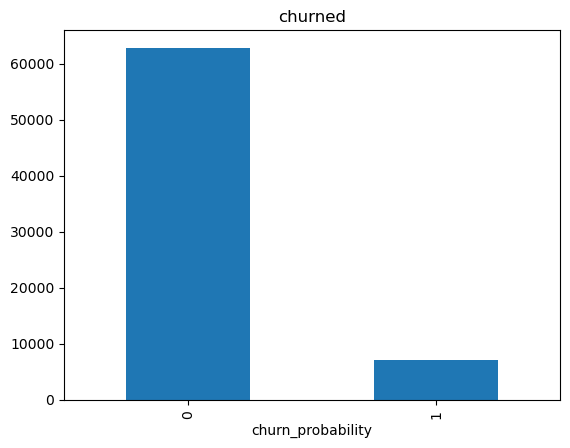

In [505]:
# Visualizing the Barplot of the churned values
data['churn_probability'].value_counts().plot(kind ='bar').set_title('churned')
plt.show()

churn_probability
0    89.811283
1    10.188717
Name: count, dtype: float64


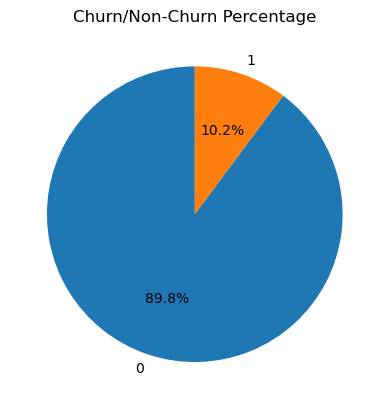

In [506]:
# Checking out churn/non churn percentage to know about the data distribution
churn_percentage = (data['churn_probability'].value_counts() / len(data)) * 100
print(churn_percentage)
# Plotting the pie chart with percentages
churn_percentage.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide the y-label to make the plot cleaner
plt.title('Churn/Non-Churn Percentage')
plt.show()

Summary: Only 10% of customers have churned with the available data set, with almost 89.8% have not churned and shows class imbalance

In [507]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 90 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69999 non-null  int64  
 1   roam_ic_mou_6       67231 non-null  float64
 2   roam_ic_mou_7       67312 non-null  float64
 3   roam_ic_mou_8       66296 non-null  float64
 4   roam_og_mou_6       67231 non-null  float64
 5   roam_og_mou_7       67312 non-null  float64
 6   roam_og_mou_8       66296 non-null  float64
 7   loc_og_t2t_mou_6    67231 non-null  float64
 8   loc_og_t2t_mou_8    66296 non-null  float64
 9   loc_og_t2m_mou_6    67231 non-null  float64
 10  loc_og_t2m_mou_8    66296 non-null  float64
 11  loc_og_t2f_mou_6    67231 non-null  float64
 12  loc_og_t2f_mou_8    66296 non-null  float64
 13  loc_og_t2c_mou_6    67231 non-null  float64
 14  loc_og_t2c_mou_7    67312 non-null  float64
 15  loc_og_t2c_mou_8    66296 non-null  float64
 16  loc_

# Splitting train and test data to avoid any contamination of the test data

In [508]:
churnColumn = 'churn_probability'
allColumns = data.columns.tolist()
allColumns.remove(churnColumn)
X = data[allColumns]
y = data[churnColumn]

X.shape, y.shape

((69999, 89), (69999,))

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=46)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 89), (21000, 89), (48999,), (21000,))

In [510]:
X_train.head()

,id,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_mou_6,total_mou_8
40394,40394,0.00,0.0,0.0,0.00,0.00,0.0,1.35,30.76,2.71,...,0,0.0,0.0,0.0,270,0.0,0.0,0.0,828.82,884.91
34929,34929,45.11,0.0,0.0,55.14,0.00,0.0,1.01,8.26,6.16,...,0,0.0,0.0,0.0,663,0.0,0.0,0.0,103.33,81.57
69330,69330,0.00,0.0,0.0,0.00,0.00,0.0,32.21,24.16,111.11,...,0,0.0,0.0,0.0,1459,0.0,0.0,0.0,143.64,97.00
68617,68617,NaN,0.0,0.0,NaN,15.08,0.0,NaN,6.89,NaN,...,0,0.0,0.0,0.0,1444,0.0,0.0,0.0,NaN,768.85
45244,45244,31.69,0.0,0.0,51.44,0.00,0.0,0.51,0.00,215.94,...,0,0.0,0.0,0.0,420,0.0,0.0,0.0,352.35,73.77


In [511]:
y_train.head()

40394    0
34929    0
69330    0
68617    0
45244    0
Name: churn_probability, dtype: int64

In [512]:
y_train.value_counts()

churn_probability
0    44097
1     4902
Name: count, dtype: int64

# 3. Handling Missing data

First lets analyse the missing data. We can use missingno library for quick visualizations.

In [513]:
#msno.bar(X_train)

In [514]:
#msno.matrix(X_train)

Lets also calculate the % missing data for each column:

In [515]:
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent

id               0.000000
roam_ic_mou_6    3.869467
roam_ic_mou_7    3.798037
roam_ic_mou_8    5.273577
roam_og_mou_6    3.869467
                   ...   
aug_vbc_3g       0.000000
jul_vbc_3g       0.000000
jun_vbc_3g       0.000000
total_mou_6      3.869467
total_mou_8      5.273577
Length: 89, dtype: float64

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 40% missing data.

In [516]:
[missing_data_percent.le(40)]

[id               True
 roam_ic_mou_6    True
 roam_ic_mou_7    True
 roam_ic_mou_8    True
 roam_og_mou_6    True
                  ... 
 aug_vbc_3g       True
 jul_vbc_3g       True
 jun_vbc_3g       True
 total_mou_6      True
 total_mou_8      True
 Length: 89, dtype: bool]

In [517]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
print(new_vars)

Index(['id', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_ot

In [518]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(48999, 89)

In [519]:
X_test_filtered = X_test[new_vars]

In [520]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_mou_6',
       'total_mou_8'],
      dtype='object'

In [521]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

In [522]:
X_test_filtered[impute_cols] = imp.transform(X_test[impute_cols])

<Axes: >

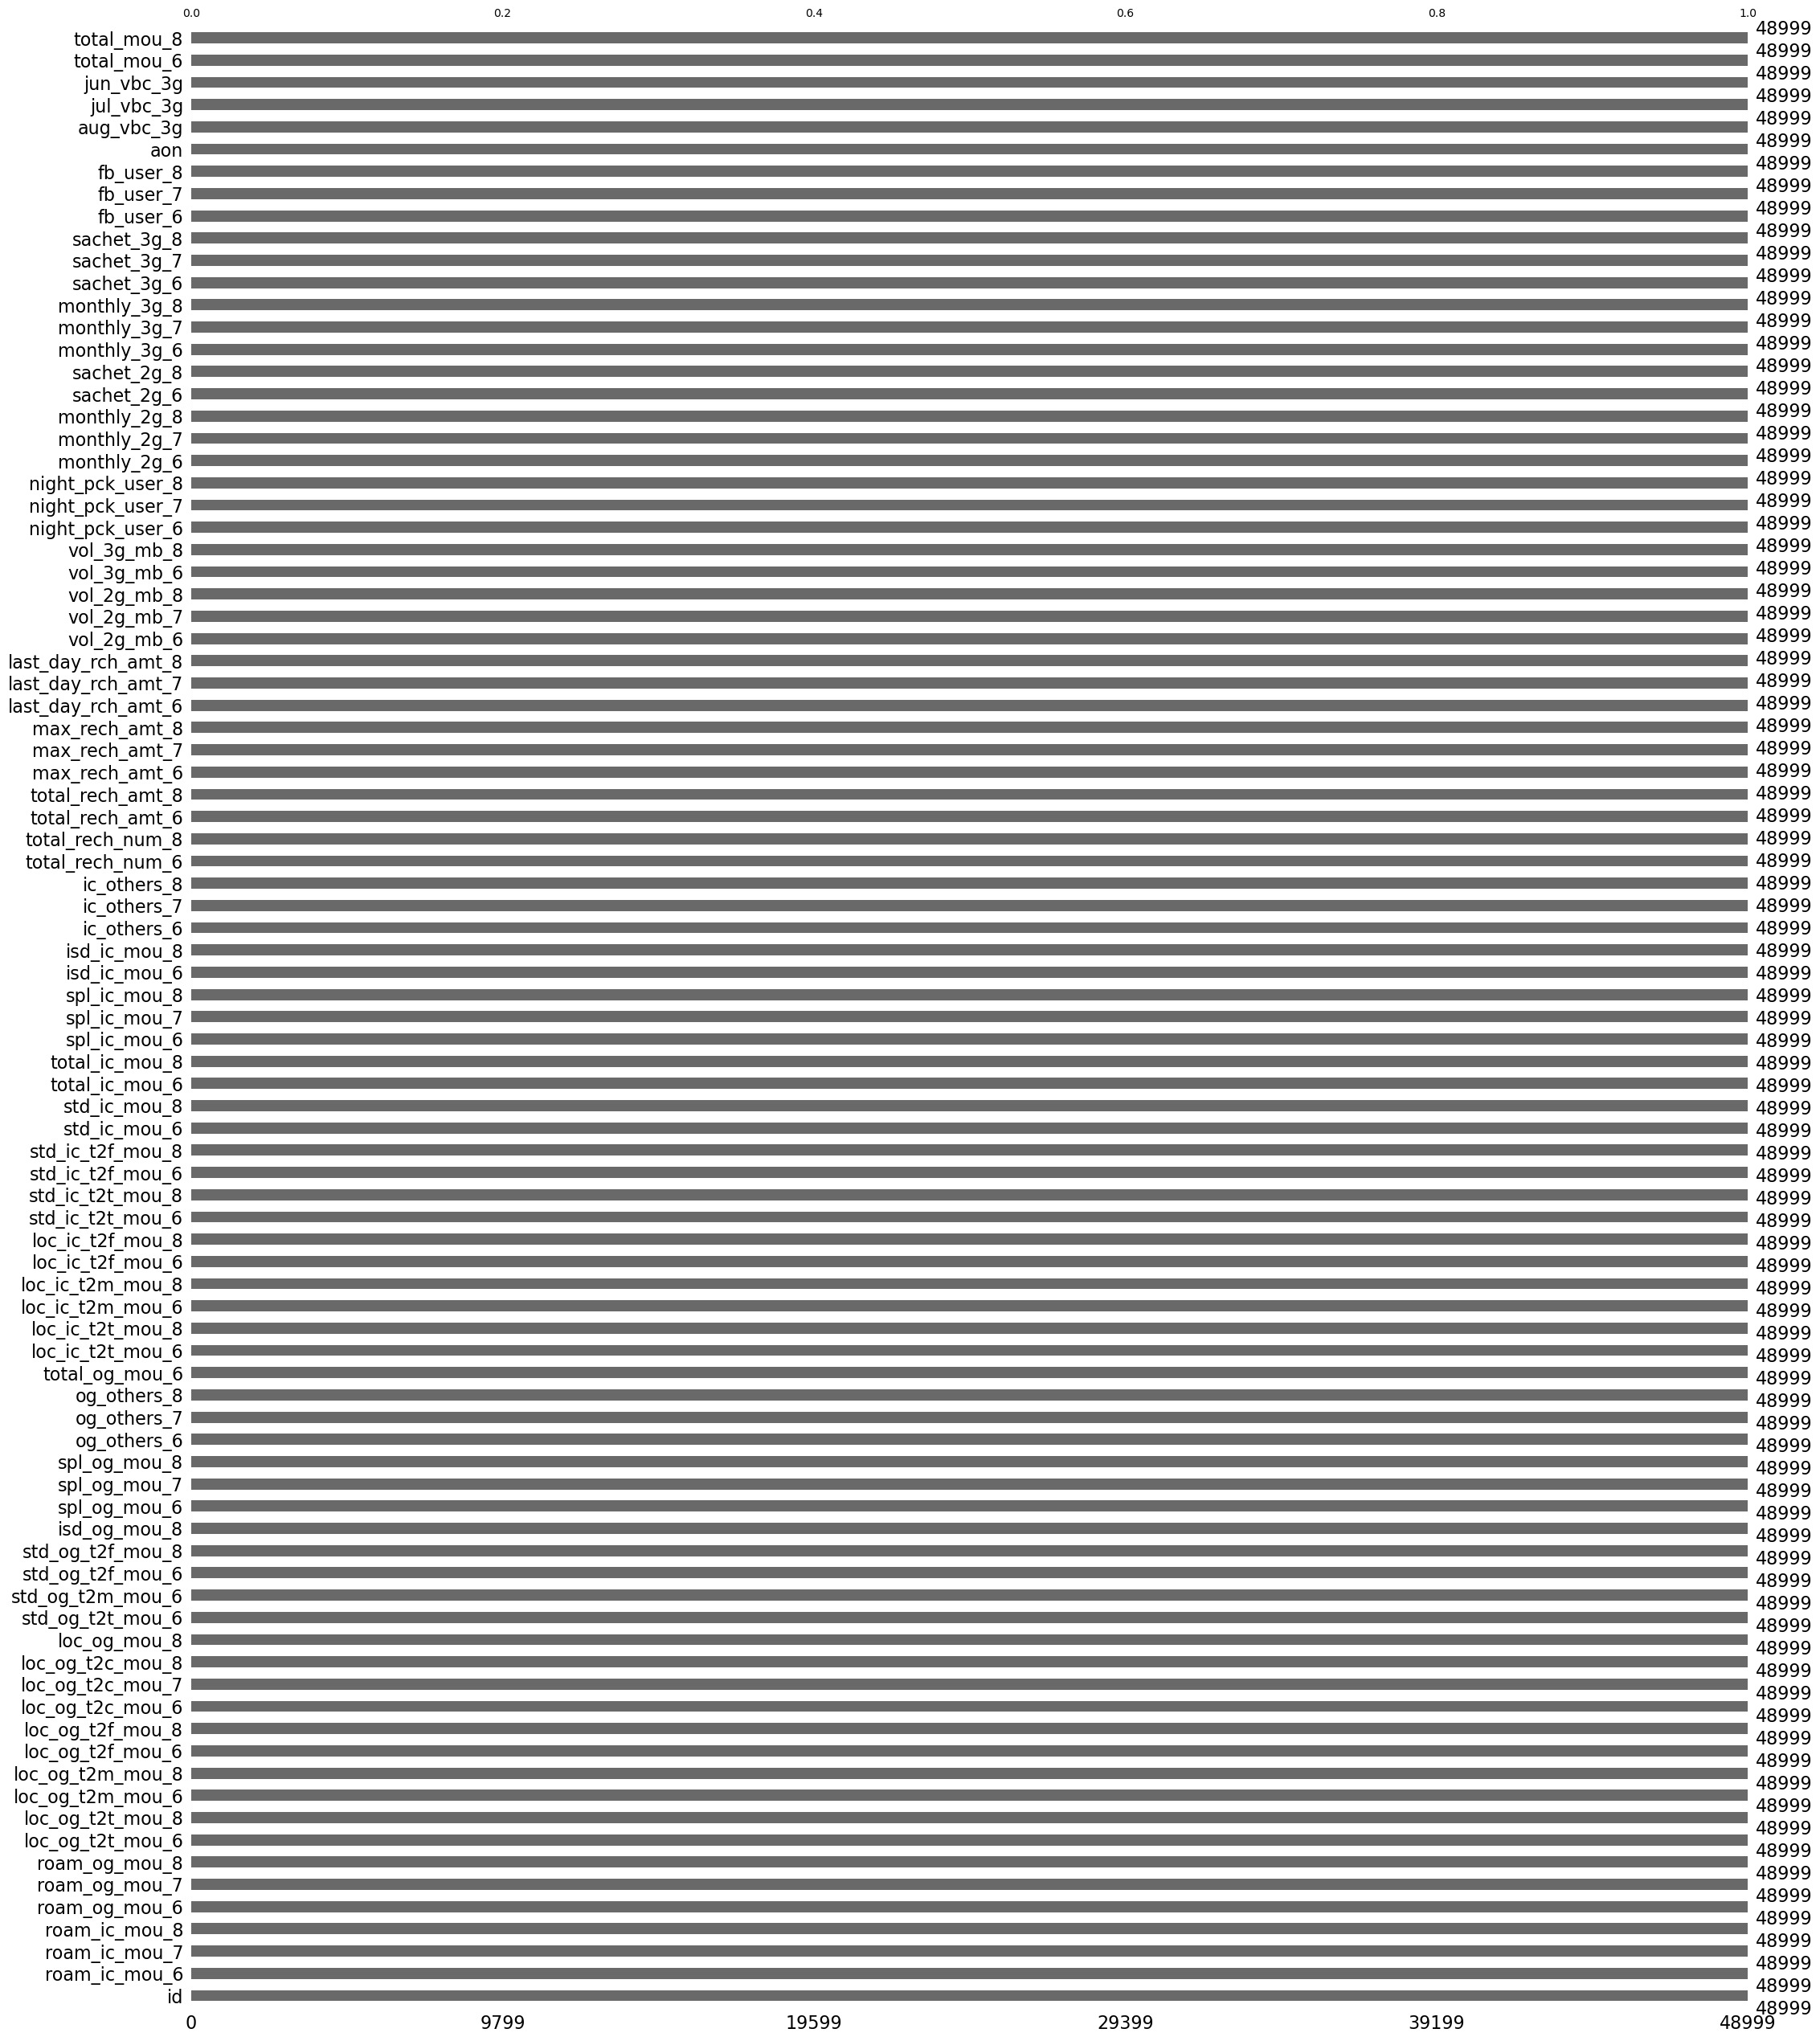

In [523]:
msno.bar(X_train_filtered)

In [524]:
X_train_filtered.describe()

,id,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_mou_6,total_mou_8
count,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,...,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.000000,48999.00000,48999.000000
mean,34997.423151,9.545166,6.694216,6.544322,13.728770,9.520571,9.288081,44.736122,43.073780,89.600434,...,0.086839,0.230250,0.231923,0.235148,1217.972081,68.445660,66.333559,60.626015,317.21942,312.012273
std,20226.119860,56.701940,50.908299,48.815548,71.913506,58.122584,61.911657,146.757744,152.361808,160.364124,...,0.699832,0.420997,0.422064,0.424095,948.189382,270.846072,270.317346,257.095899,466.50928,486.287944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,17448.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980000,0.760000,7.330000,...,0.000000,0.000000,0.000000,0.000000,469.000000,0.000000,0.000000,0.000000,51.94000,43.500000
50%,35018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.560000,10.040000,37.780000,...,0.000000,0.000000,0.000000,0.000000,867.000000,0.000000,0.000000,0.000000,155.38000,143.710000
75%,52522.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.640000,37.210000,105.400000,...,0.000000,0.000000,0.000000,0.000000,1808.000000,0.000000,0.000000,0.000000,388.35500,379.075000
max,69998.000000,2850.980000,2877.060000,2480.060000,2337.160000,1900.060000,3493.360000,6431.330000,10752.560000,4212.040000,...,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,10673.28000,14043.050000


# 4. Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

<Axes: >

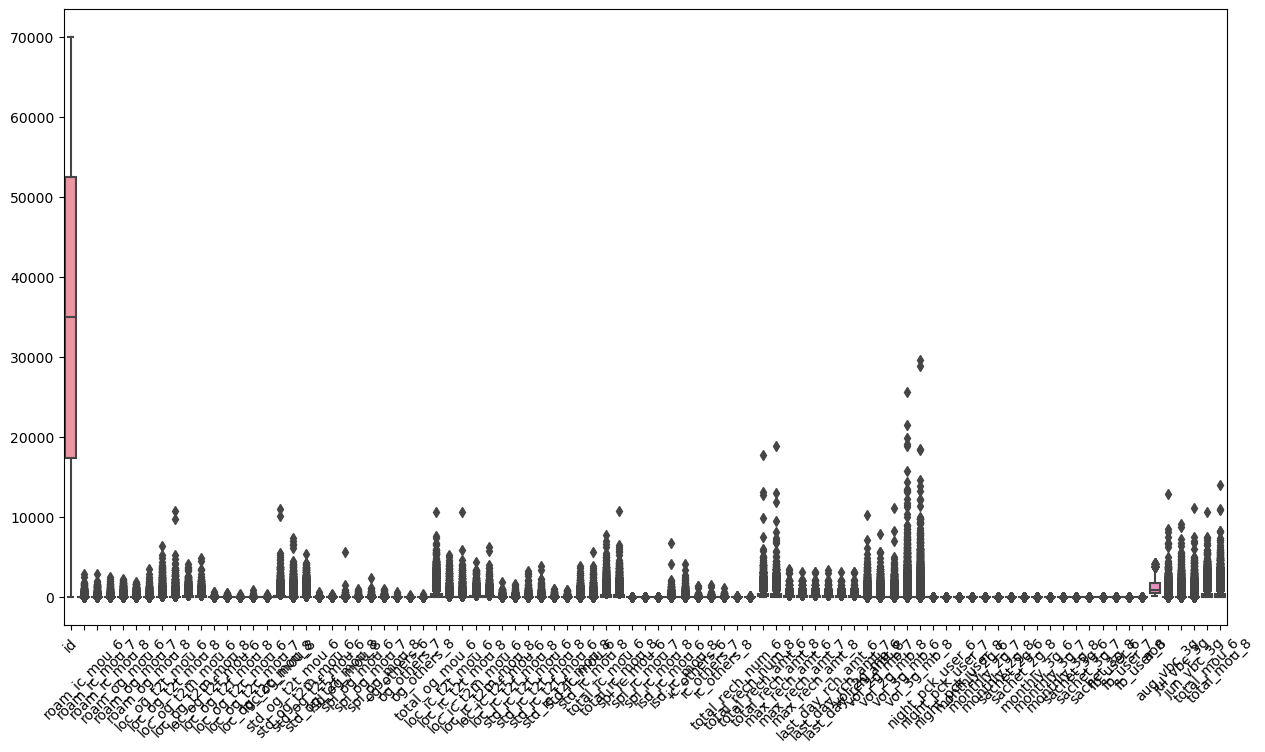

In [525]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

### 4.1 Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [526]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<Axes: >

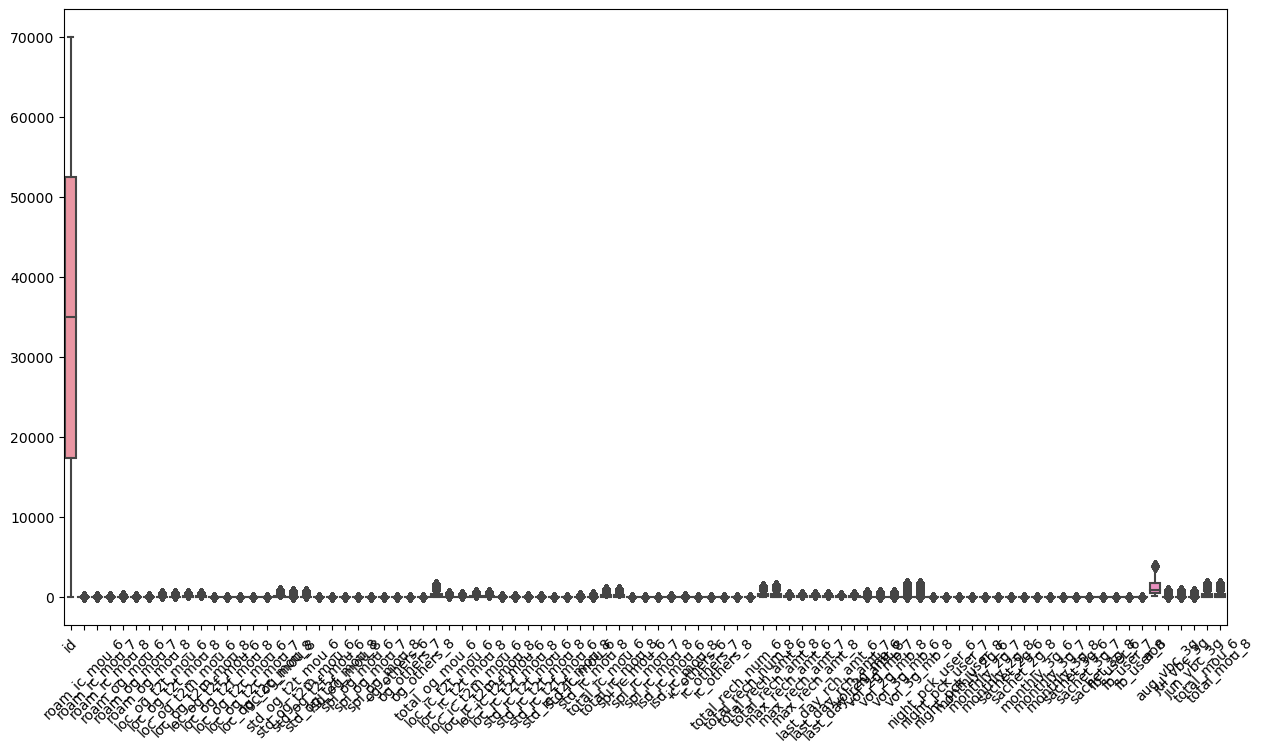

In [527]:
X_train_filtered1 = X_train_filtered.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered1)

### 4.2 Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [528]:
scale = StandardScaler()
X_train_filtered2 = scale.fit_transform(X_train_filtered1)

In [529]:
X_test_filtered2 = scale.transform(X_test_filtered[new_vars])

In [530]:
X_test_filtered2

array([[ 1.01293704e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.03787812e-01, -4.03149596e-01, -3.97103928e-01],
       [-7.63002530e-01, -2.57711061e-01, -2.21464271e-01, ...,
        -3.03787812e-01, -1.42054959e-01, -7.34563968e-01],
       [ 1.71342456e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.03787812e-01, -7.88889110e-01, -7.52451994e-01],
       ...,
       [-1.36485421e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.03787812e-01,  2.52793420e-01,  1.01425334e-01],
       [ 1.69028592e+00, -2.57711061e-01,  1.69972868e-03, ...,
        -3.03787812e-01, -3.97600517e-01, -7.58072478e-01],
       [-1.08274087e+00, -2.57711061e-01, -2.21464271e-01, ...,
        -3.03787812e-01, -7.40334669e-01, -5.24450245e-01]])

<Axes: >

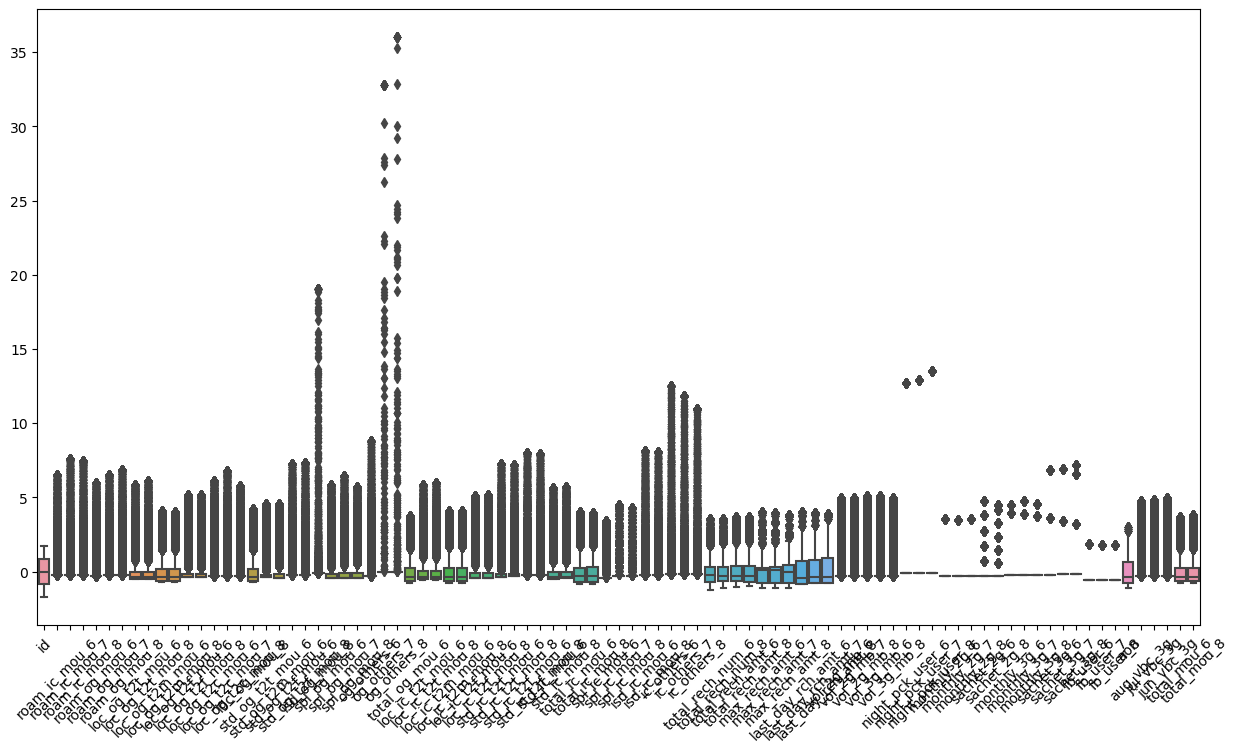

In [531]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_filtered2, columns=new_vars))

You can perform feature transformations at this stage.

1. **Positively skewed:** Common transformations of this data include square root, cube root, and log.
2. **Negatively skewed:** Common transformations include square, cube root and logarithmic.

Please read the following link to understand how to perform feature scaling and preprocessing : https://scikit-learn.org/stable/modules/preprocessing.html

Lets also plot the correlations for each feature for bivariate analysis.

<Axes: >

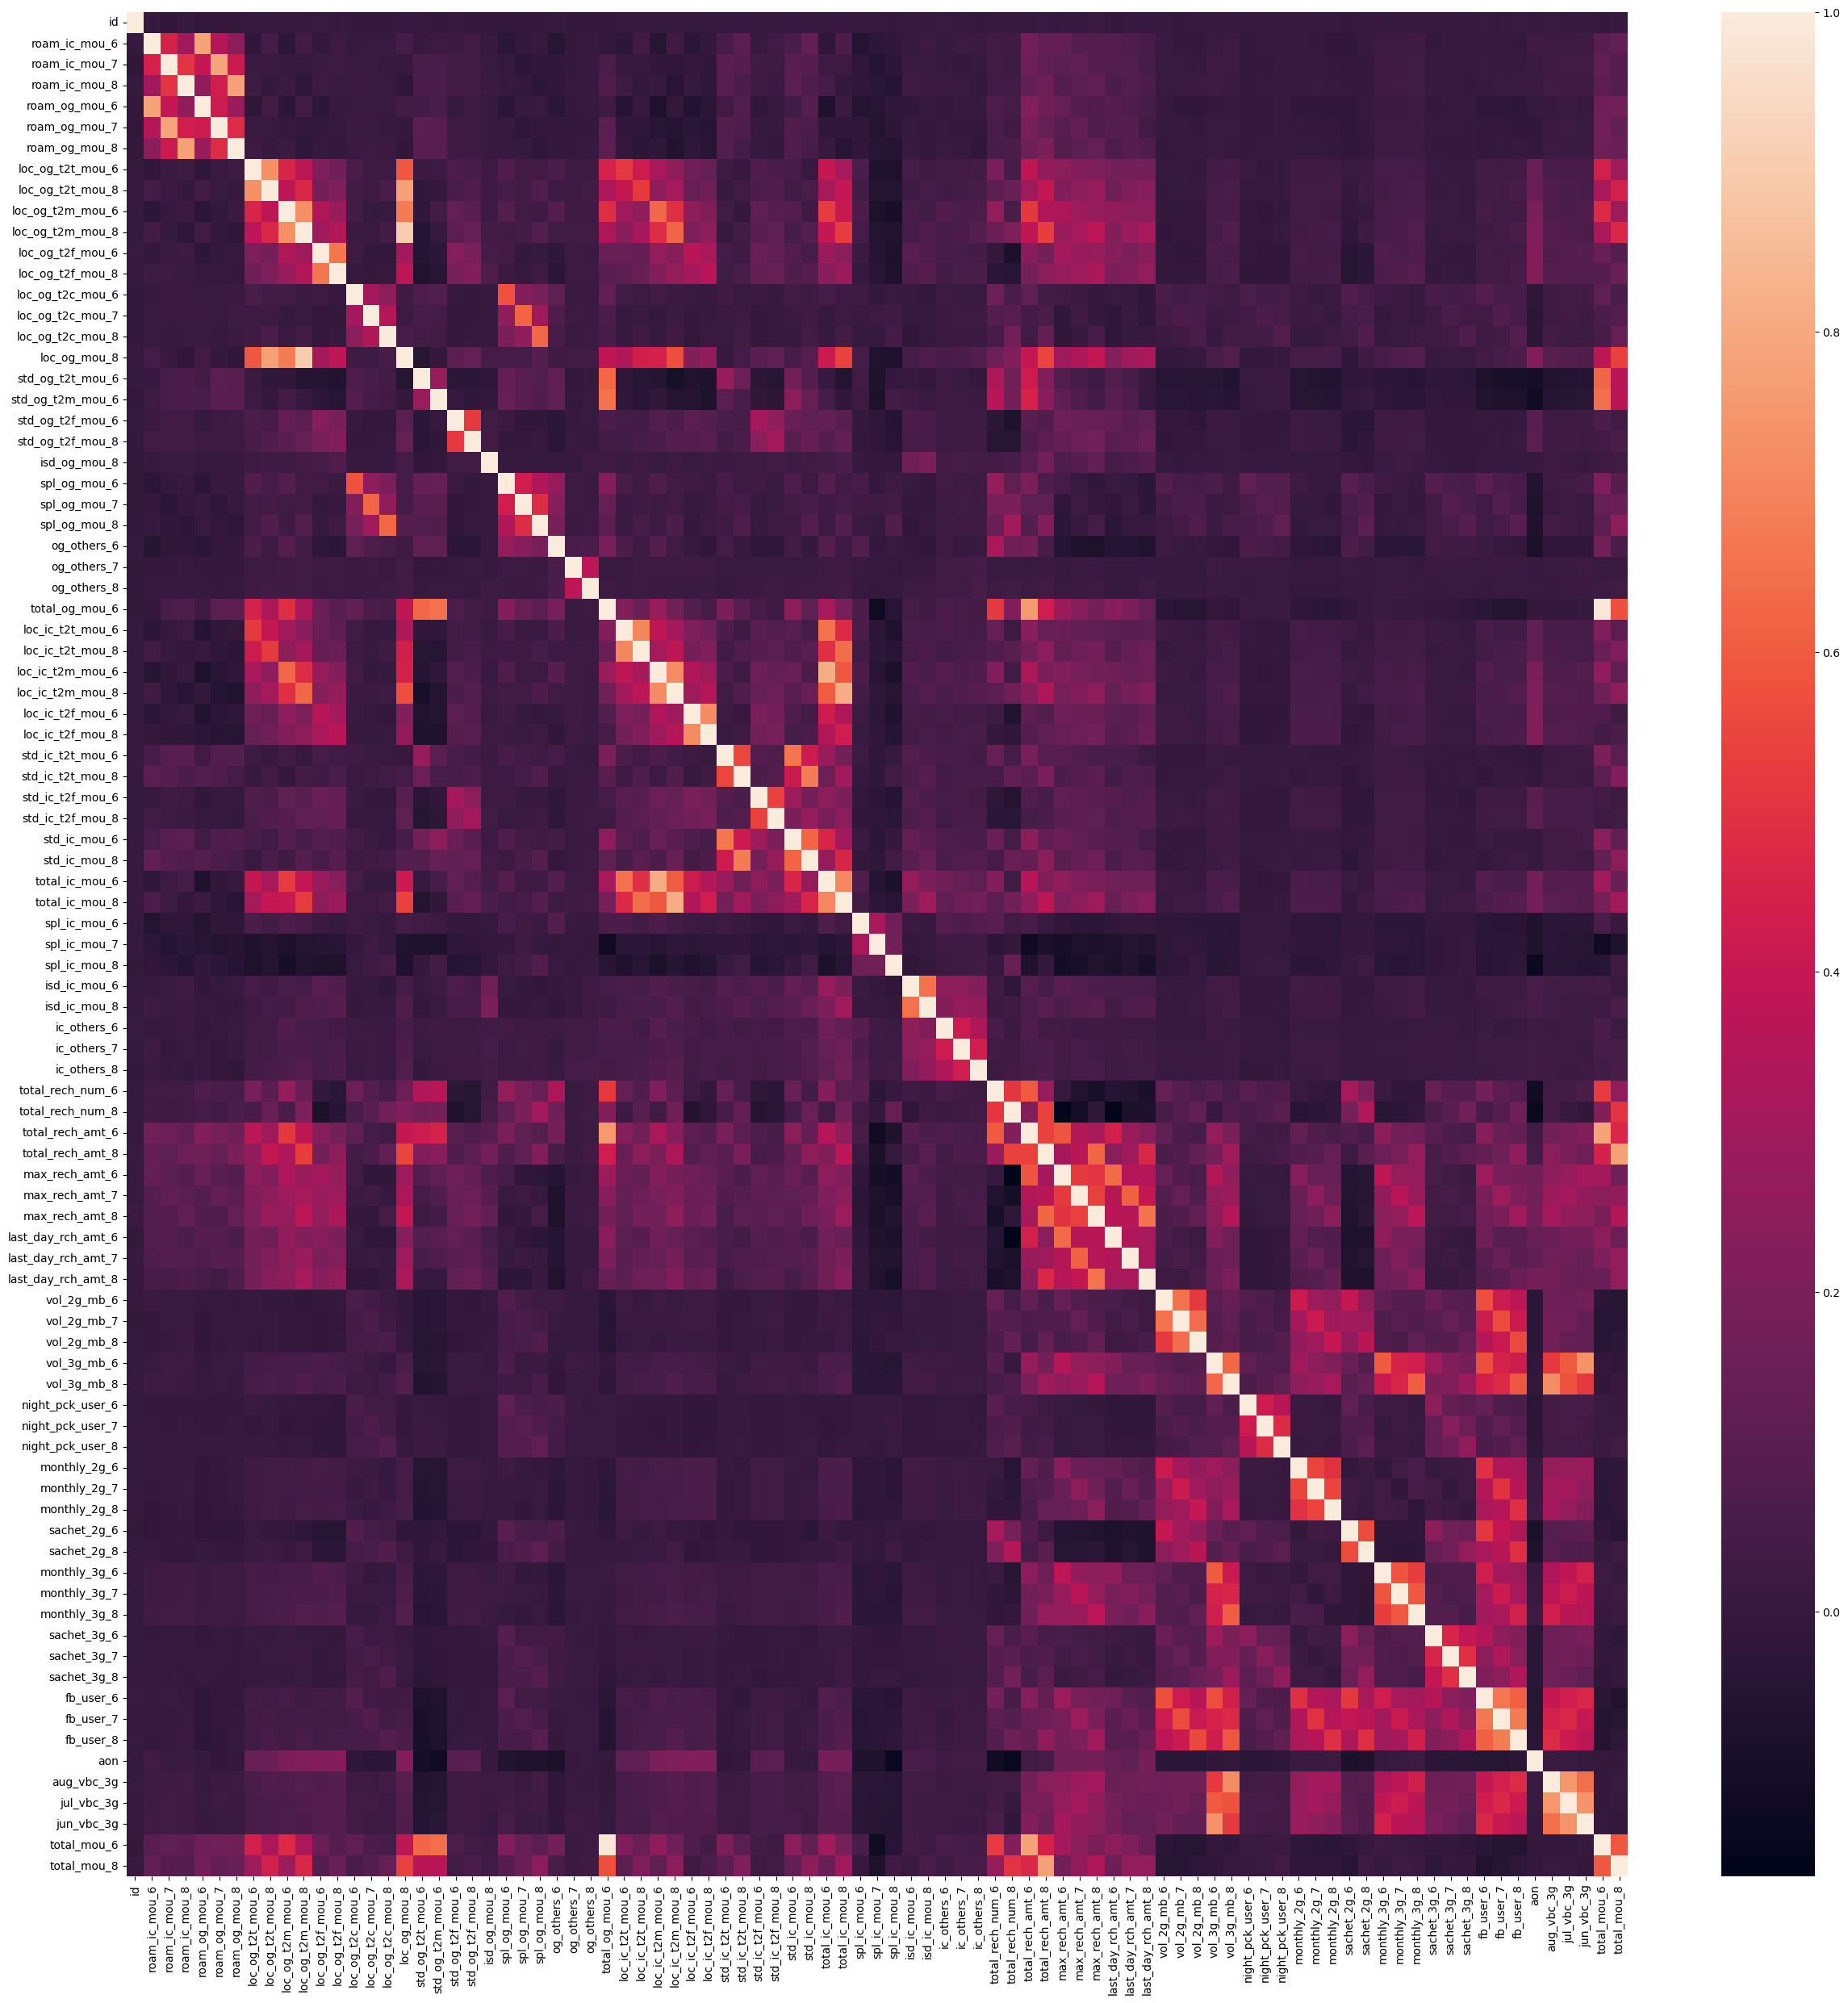

In [532]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.DataFrame(X_train_filtered2, columns=new_vars).corr())

# 5. Feature engineering using Logistic Regression

Let's understand feature importances for raw features as well as components to decide top features for modelling.

In [533]:
X_train_filtered2

array([[ 0.26681499, -0.25771106, -0.22146427, ..., -0.30378781,
         1.38053902,  1.51298816],
       [-0.00338294,  1.43240687, -0.22146427, ..., -0.30378781,
        -0.51842386, -0.54872868],
       [ 1.69745495, -0.25771106, -0.22146427, ..., -0.30378781,
        -0.41291283, -0.50912865],
       ...,
       [ 0.82100504, -0.25771106, -0.22146427, ..., -0.30378781,
        -0.75247982, -0.75678926],
       [ 1.07261296, -0.25771106, -0.22146427, ..., -0.30378781,
        -0.06326851, -0.24984211],
       [-0.23481872, -0.25771106, -0.22146427, ..., -0.30378781,
        -0.78888911, -0.61596918]])

### 5.1 Model using RFECV and Logistic Regression

Based on analysis of Model 1 for VIF, Summary results above we could drop columns that have high correlation

In [534]:
# X_train_fitlered2 is scaled. Since its anumpy array, lets create dataframe
X_train_scaled = pd.DataFrame(X_train_filtered2, columns=new_vars)
X_test_scaled = pd.DataFrame(X_test_filtered2, columns=new_vars)

In [535]:
X_train_scaled.head()

,id,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_mou_6,total_mou_8
0,0.266815,-0.257711,-0.221464,-0.223562,-0.280144,-0.247692,-0.240394,-0.484220,-0.084463,-0.678194,...,-0.195228,-0.546921,-0.549502,-0.554474,-0.999960,-0.321094,-0.311992,-0.303788,1.380539,1.512988
1,-0.003383,1.432407,-0.221464,-0.223562,1.224951,-0.247692,-0.240394,-0.488663,-0.381796,-0.649216,...,-0.195228,-0.546921,-0.549502,-0.554474,-0.585372,-0.321094,-0.311992,-0.303788,-0.518424,-0.548729
2,1.697455,-0.257711,-0.221464,-0.223562,-0.280144,-0.247692,-0.240394,-0.080888,-0.171680,0.232279,...,-0.195228,-0.546921,-0.549502,-0.554474,0.254354,-0.321094,-0.311992,-0.303788,-0.412913,-0.509129
3,1.662203,-0.257711,-0.221464,-0.223562,-0.280144,0.307622,-0.240394,-0.501864,-0.399900,-0.700955,...,-0.195228,-0.546921,-0.549502,-0.554474,0.238530,-0.321094,-0.311992,-0.303788,-0.788889,1.215128
4,0.506606,0.929605,-0.221464,-0.223562,1.123956,-0.247692,-0.240394,-0.495198,-0.490950,1.112766,...,-0.195228,-0.546921,-0.549502,-0.554474,-0.841720,-0.321094,-0.311992,-0.303788,0.133384,-0.568747


In [536]:
X_train_scaled.shape

(48999, 89)

In [537]:
logistic_regression = LogisticRegression(max_iter=1000)

In [538]:
rfecv = RFECV(estimator=logistic_regression, n_jobs=-1, step=1, cv=5, scoring='accuracy')

In [539]:
rfecv.fit(X_train_filtered2, y_train)

RFECV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
      scoring='accuracy')

In [540]:
# Get the number of features selected by RFECV based on best cross-validated performance
optimal_features_rfecv = rfecv.n_features_

# Get the indices of the selected features
rfecv_support = rfecv.support_

# Get the names of the selected features (assuming you have feature names)
selected_features_rfecv = X_train_scaled.columns[rfecv_support]

print(f"RFECV Selected Features ({optimal_features_rfecv} features): {selected_features_rfecv}")

RFECV Selected Features (48 features): Index(['roam_ic_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_mou_6', 'total_mou_8'],
      dtype='object')


#### Analyse Performance

In [541]:
print_logistic_model_summary(X_train_scaled[selected_features_rfecv], y_train.values, X_test_scaled[selected_features_rfecv], y_test.values)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48950
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10210.
Date:                Mon, 10 Jun 2024   Deviance:                       20421.
Time:                        22:49:47   Pearson chi2:                 2.57e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2083
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2809      0

Summary: We have very good accuracy score of 89% and Precision (ratio of correctly predicted positive observations to the total predicted positives) of 64% with just 32 columns

In [542]:
print_vif(X_train_scaled[selected_features_rfecv])

              Features    VIF
46         total_mou_6  68.61
13      total_og_mou_6  67.13
5         loc_og_mou_8  41.48
3     loc_og_t2m_mou_8  20.91
21      total_ic_mou_8  12.71
2     loc_og_t2t_mou_8   9.68
28    total_rech_amt_8   8.10
15    loc_ic_t2m_mou_8   6.14
27    total_rech_amt_6   6.04
47         total_mou_8   4.95
31      max_rech_amt_8   3.56
41           fb_user_8   3.52
19        std_ic_mou_8   3.44
43          aug_vbc_3g   3.34
44          jul_vbc_3g   3.24
35         vol_3g_mb_8   3.12
14    loc_ic_t2t_mou_8   3.11
29      max_rech_amt_6   3.03
7     std_og_t2m_mou_6   2.92
6     std_og_t2t_mou_6   2.89
26    total_rech_num_8   2.79
20      total_ic_mou_6   2.64
45          jun_vbc_3g   2.45
39         sachet_2g_8   2.22
37        monthly_2g_8   1.94
17    std_ic_t2t_mou_8   1.94
30      max_rech_amt_7   1.93
33  last_day_rch_amt_8   1.92
0        roam_ic_mou_6   1.86
32  last_day_rch_amt_6   1.79
34         vol_2g_mb_8   1.77
40        monthly_3g_7   1.67
36        

VIF Interpretation: There's no single threshold for a "high" VIF. But, inthe industry, following are observed as a general guideline:
* **VIF < 5**: Likely not a major concern for multicollinearity.
* **5 <= VIF < 10**: Might indicate some multicollinearity, but further investigation is needed.
* **VIF >= 10**: Suggests strong multicollinearity, and these features are likely candidates for elimination.

Lets remove the below 2 columns and examine the results:
We will also use PCA to further reduce the multicollinearity issue
<pre>
                        VIF    P-Value
46         total_mou_6  68.61 0.208
13      total_og_mou_6  67.13 0.218 

In [544]:
# # Lets drop Utilities and BsmtUnfSF which is Unfinished square feet of basement area from the model and analyse the results:
# selected_features_rfecv.remove('total_mou_6','total_og_mou_6')
# X_train_rfe_new = X_train_scaled[selected_features_rfecv]
# X_train_ols = sm.add_constant(X_train_rfe_new)
# sm_ols = sm.GLM(y_train.values.reshape(-1,1), X_train_ols).fit()
# print(sm_ols.summary())

In [545]:
#print_vif(X_train_scaled[selected_features_rfecv])

#### Prepare and submit submission file using Logistic Regression

In [546]:
# Transform the training and test sets
X_train_rfecv = X_train_scaled[selected_features_rfecv]
X_test_rfecv = X_train_scaled[selected_features_rfecv]

# Create a new pipeline with the selected features and trained model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('pca',PCA(n_components=45)),
    ('logisticregression', LogisticRegression(max_iter=1000, tol=0.001))  # Logistic Regression model
])

pipeline.fit(X_train_rfecv, y_train)

Pipeline(steps=[('imputer', SimpleImputer(fill_value=0, strategy='constant')),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=45)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, tol=0.001))])

In [547]:
predict_and_save(pipeline, selected_features_rfecv, "logistic_regression", output_path)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,1


# 6. Model Building using Decision Tree


In [548]:
X.head()

,id,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_mou_6,total_mou_8
0,0,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.28,5.29,...,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,80.82,3.62
1,1,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0.00,30.89
2,2,0.00,0.0,0.0,0.00,0.0,0.00,0.53,0.00,24.11,...,0,0.0,0.0,0.0,882,0.0,0.0,0.0,54.52,0.00
3,3,0.00,0.0,0.0,0.00,0.0,1.63,6.99,0.00,37.91,...,0,0.0,0.0,0.0,982,0.0,0.0,0.0,76.02,50.23
4,4,53.64,0.0,0.0,15.73,0.0,0.00,10.16,6.13,36.74,...,0,1.0,1.0,1.0,647,0.0,0.0,0.0,78.27,15.76


In [549]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_imputed)

In [550]:

X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, train_size=0.7, random_state=46)

In [551]:
initial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
initial_dt.fit(X_train, y_train)

# Train accuracy
y_train_pred = initial_dt.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print(f'Train data accuracy: {train_accuracy:.2f}')

# Test predictions
y_test_pred = initial_dt.predict(X_test)

# Print the classification report on test data
test_classification_report = metrics.classification_report(y_test, y_test_pred)
print("Classification report on test data:")
print(test_classification_report)

Train data accuracy: 0.93
Classification report on test data:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     18770
           1       0.51      0.33      0.40      2230

    accuracy                           0.90     21000
   macro avg       0.72      0.65      0.67     21000
weighted avg       0.88      0.90      0.89     21000



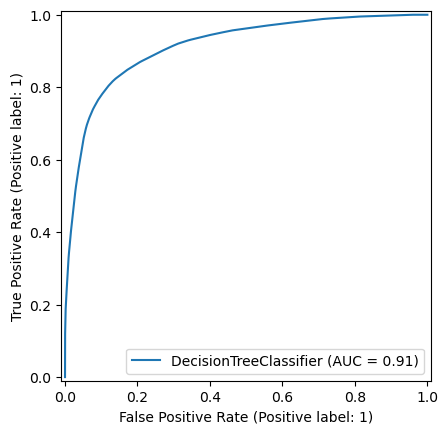

In [552]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(initial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

## Hyperparameter tuning

In [553]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their values for tuning
param_grid = {
    'max_depth': [3, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [554]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best estimator: {best_estimator}')
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
y_test_pred = best_estimator.predict(X_test)

# Print the classification report

print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=42)
Best Score: 0.9011816782637128
Classification report on test data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18770
           1       0.56      0.25      0.35      2230

    accuracy                           0.90     21000
   macro avg       0.74      0.61      0.65     21000
weighted avg       0.88      0.90      0.88     21000



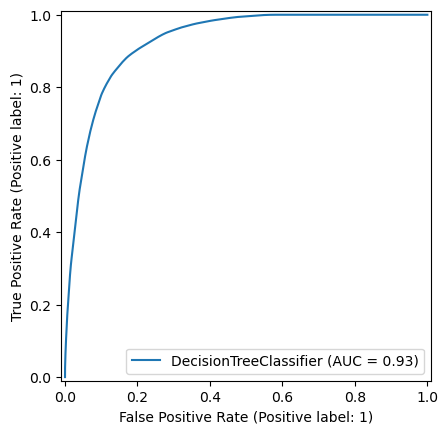

In [555]:
RocCurveDisplay.from_estimator(best_estimator, X_train, y_train, drop_intermediate=False)
plt.show()

# 7. Model Building using Random Forest

In [556]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values for tuning
param_grid = {
    'n_estimators': [10, 15, 20],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [557]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 15, 20]},
             scoring='accuracy')

In [558]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best estimator: {best_estimator}')
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
y_test_pred = best_estimator.predict(X_test)

# Print the classification report
print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=20,
                       random_state=42)
Best Score: 0.9161003226068466
Classification report on test data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18770
           1       0.63      0.33      0.43      2230

    accuracy                           0.91     21000
   macro avg       0.78      0.65      0.69     21000
weighted avg       0.89      0.91      0.90     21000



# 8. AdaBoost Classifier

In [559]:
# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model
ada.fit(X_train, y_train)

# Make predictions
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

In [560]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])

print(f'Train accuracy: {train_accuracy:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test AUC: {test_auc:.2f}')
print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy: 0.91
Test accuracy: 0.90
Test AUC: 0.87
Classification report on test data:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     18770
           1       0.62      0.21      0.32      2230

    accuracy                           0.90     21000
   macro avg       0.77      0.60      0.63     21000
weighted avg       0.88      0.90      0.88     21000



In [561]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.8938095238095238

In [562]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

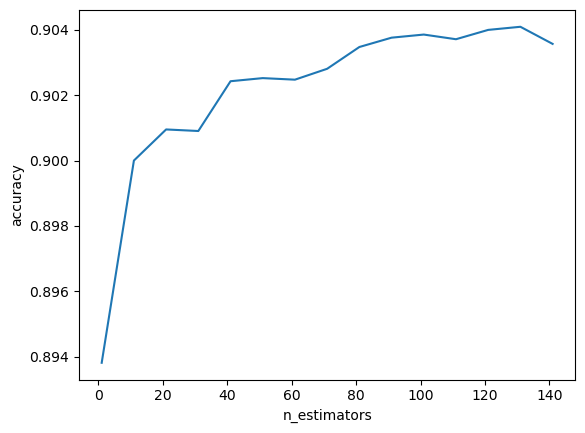

In [563]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [564]:
# Initialize the base estimator (shallow tree)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoostClassifier with the base estimator
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [565]:
# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [566]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best estimator: {best_estimator}')

# Evaluate the best model on the test set
y_test_pred = best_estimator.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, best_estimator.predict_proba(X_test)[:, 1])

print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Print the classification report on the test data
print("Classification report on test data:")
print(metrics.classification_report(y_test, y_test_pred))

Best parameters: {'n_estimators': 200}
Best estimator: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   n_estimators=200, random_state=42)
Test accuracy: 0.90
Test AUC: 0.88
Classification report on test data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18770
           1       0.62      0.25      0.35      2230

    accuracy                           0.90     21000
   macro avg       0.77      0.61      0.65     21000
weighted avg       0.89      0.90      0.89     21000



# Final model using best parameters of Random Forest Classifier

In [567]:
# Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
# Best estimator: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20, random_state=42)
# Define the pipeline steps
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle missing values
    ('scaler', StandardScaler()),  # Step 1: Scaling the features
    ('pca', PCA(n_components=25)),  # PCA for dimensionality reduction
    ('classifier', RandomForestClassifier(
        bootstrap=False,
        max_depth=20,
        min_samples_leaf=4,
        min_samples_split=10,
        n_estimators=20,
        random_state=42
    ))
])

# Fit the pipeline on the training data
pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(fill_value=0, strategy='constant')),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=25)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=20,
                                        random_state=42))])

In [568]:
predict_and_save(pipeline, X.columns, "Random_Forest", output_path)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


# 8. Conclusion

The following are the Test data accuracy scores obtained for variaous algorithms

- PCA with Decision tree classifier - 90
- Decision tree with hyperparameter accuracy - 90
- RandomForest accuracy - 91.75
- Adaboost Classifier - 91

Random Forest provides the best fit model

Following are the important variables that are strong predictorsd of churn:
